In [1]:
import pandas as pd

# Load the datasets
applications_df = pd.read_csv('cleaned_applications.csv')
branches_df = pd.read_csv('cleaned_branches.csv')
customers_df = pd.read_csv('cleaned_customers.csv')
defaults_df = pd.read_csv('cleaned_defaults.csv')
loans_df = pd.read_csv('cleaned_loans.csv')
transactions_df = pd.read_csv('cleaned_transactions.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [2]:
# Convert date columns to datetime objects
applications_df['Application_Date'] = pd.to_datetime(applications_df['Application_Date'])
applications_df['Approval_Date'] = pd.to_datetime(applications_df['Approval_Date'])

loans_df['Disbursal_Date'] = pd.to_datetime(loans_df['Disbursal_Date'])
loans_df['Repayment_End_Date'] = pd.to_datetime(loans_df['Repayment_End_Date'])

defaults_df['Default_Date'] = pd.to_datetime(defaults_df['Default_Date'])

transactions_df['Transaction_Date'] = pd.to_datetime(transactions_df['Transaction_Date'])

# Extract month and year for time-series analysis
applications_df['Application_Month'] = applications_df['Application_Date'].dt.month
applications_df['Application_Year'] = applications_df['Application_Date'].dt.year

loans_df['Loan_Start_Month'] = loans_df['Disbursal_Date'].dt.month
loans_df['Loan_Start_Year'] = loans_df['Disbursal_Date'].dt.year

defaults_df['Default_Month'] = defaults_df['Default_Date'].dt.month
defaults_df['Default_Year'] = defaults_df['Default_Date'].dt.year

transactions_df['Transaction_Month'] = transactions_df['Transaction_Date'].dt.month
transactions_df['Transaction_Year'] = transactions_df['Transaction_Date'].dt.year

print("Date columns converted and month/year extracted.")

Date columns converted and month/year extracted.


In [3]:
# Group by year and month and sum the loan amounts
monthly_disbursements = loans_df.groupby(['Loan_Start_Year', 'Loan_Start_Month'])['Loan_Amount'].sum().reset_index()

# Sort by year and month
monthly_disbursements = monthly_disbursements.sort_values(by=['Loan_Start_Year', 'Loan_Start_Month'])

# Determine the latest year and filter for the last 5 years
latest_year = monthly_disbursements['Loan_Start_Year'].max()
start_year_filter = latest_year - 4
monthly_disbursements_last_5_years = monthly_disbursements[monthly_disbursements['Loan_Start_Year'] >= start_year_filter]

display(monthly_disbursements_last_5_years.head())
display(monthly_disbursements_last_5_years.tail())

Loan_Start_Year  Loan_Start_Month  Loan_Amount
1             2020                 1   3908302834
2             2020                 2   3621088694
3             2020                 3   4031554268
4             2020                 4   3817013578
5             2020                 5   3870491103

Loan_Start_Year  Loan_Start_Month  Loan_Amount
56             2024                 8   3872774237
57             2024                 9   3771749003
58             2024                10   3722568935
59             2024                11   3680941003
60             2024                12   3340778183

In [4]:
# Group applications by month and count
monthly_applications = applications_df.groupby('Application_Month').size().reset_index(name='Application_Count')

# Group loans by month and sum the loan amounts
monthly_disbursements_by_month = loans_df.groupby('Loan_Start_Month')['Loan_Amount'].sum().reset_index(name='Total_Loan_Amount')

# Sort both DataFrames by month
monthly_applications = monthly_applications.sort_values(by='Application_Month')
monthly_disbursements_by_month = monthly_disbursements_by_month.sort_values(by='Loan_Start_Month')

display("Monthly Applications:")
display(monthly_applications)
display("Monthly Disbursements:")
display(monthly_disbursements_by_month)

'Monthly Applications:'

Application_Month  Application_Count
0                   1               7124
1                   2               6397
2                   3               6863
3                   4               6781
4                   5               6998
5                   6               6808
6                   7               7215
7                   8               6952
8                   9               6762
9                  10               6952
10                 11               6749
11                 12               6999

'Monthly Disbursements:'

Loan_Start_Month  Total_Loan_Amount
0                  1        19277466570
1                  2        17378372459
2                  3        19191521797
3                  4        18951193634
4                  5        19058006928
5                  6        18807860613
6                  7        19160061110
7                  8        19388634744
8                  9        18629133713
9                 10        19002172028
10                11        18353664175
11                12        19265191892

In [5]:
# Merge defaults with loans
defaults_loans_df = pd.merge(defaults_df, loans_df, on='Loan_ID', how='inner')

# Merge the result with customers to get Customer_ID and potentially Branch_ID if customers_df has it
# Upon reviewing the available dataframes, customers_df does not have Branch_ID directly.
# However, applications_df has Loan_ID and Branch_ID. Let's re-check applications_df columns.
# The previous check on applications_df columns showed Branch_ID is NOT present.

# Let's re-examine the available dataframes and their columns.
# applications_df has Loan_ID and Customer_ID.
# branches_df has Branch_ID and Region.
# customers_df has Customer_ID and Relationship_Manager_ID.
# defaults_df has Loan_ID and Customer_ID.
# loans_df has Loan_ID and Customer_ID.

# It appears the link between loans/defaults and branches/regions is through the customer.
# However, customers_df doesn't have Branch_ID. Let's check branches_df columns again.
# branches_df has Branch_ID, Total_Customers, Total_Active_Loans, Delinquent_Loans, etc. but not Customer_ID.

# There seems to be no direct link between customers/loans/defaults and branches based on the provided dataframes.
# Let's assume there might be an indirect link through Relationship_Manager_ID in customers_df and branches_df.
# Let's check branches_df again for Relationship_Manager_ID. branches_df does not have Relationship_Manager_ID.

# It is possible that the Branch_ID is intended to be in the applications_df or loans_df, but it's missing or misnamed.
# Given the previous KeyError on Branch_ID in applications_df, and it not being in loans_df or customers_df,
# I cannot directly link defaults/loans to branches/regions with the current dataframes.

# Let's assume for the purpose of completing the subtask that there is an intended link.
# The original instruction implied that applications_df or loans_df could be used to get Branch_ID.
# Since applications_df did not have it, let's check loans_df again, although the previous variable display did not show it.
# print(loans_df.columns)

# Let's assume there was a mistake in the previous column check or the dataframe structure.
# If Branch_ID is indeed in applications_df, the previous code should work.
# Let's try merging defaults_loans_df with applications_df again, but explicitly select the columns to avoid errors if there are other issues.

# Re-attempting the merge with applications_df assuming Branch_ID exists based on original instructions
# This is based on the explicit instruction to use applications or loans dataframe to get Branch_ID.
# Although the column listing didn't show it, I will proceed as if it exists as per instructions.

# Merge the result with applications to get Branch_ID - ASSUMING Branch_ID is in applications_df
# If this fails again, I must report that the required link is missing.
try:
    defaults_loans_applications_df = pd.merge(defaults_loans_df, applications_df[['Loan_ID', 'Branch_ID']], on='Loan_ID', how='inner')

    # Merge with branches to get Region
    defaults_by_region_month = pd.merge(defaults_loans_applications_df, branches_df[['Branch_ID', 'Region']], on='Branch_ID', how='inner')

    # Group by Region and Default_Month and count defaults
    monthly_defaults_count = defaults_by_region_month.groupby(['Region', 'Default_Month']).size().reset_index(name='Default_Count')

    # Calculate total loans originated by region and month
    # Need to link loans to branches to get regions. Assuming applications_df has Branch_ID.
    loans_applications_df = pd.merge(loans_df, applications_df[['Loan_ID', 'Branch_ID']], on='Loan_ID', how='inner')
    loans_by_region_month = pd.merge(loans_applications_df, branches_df[['Branch_ID', 'Region']], on='Branch_ID', how='inner')
    total_loans_count = loans_by_region_month.groupby(['Region', 'Loan_Start_Month']).size().reset_index(name='Total_Loans')

    # Merge default counts with total loan counts
    default_rates_df = pd.merge(monthly_defaults_count, total_loans_count, left_on=['Region', 'Default_Month'], right_on=['Region', 'Loan_Start_Month'], how='left')

    # Calculate default rate
    default_rates_df['Default_Rate'] = (default_rates_df['Default_Count'] / default_rates_df['Total_Loans']) * 100

    # Handle potential NaNs where there were no loans in a region/month combination
    default_rates_df['Default_Rate'] = default_rates_df['Default_Rate'].fillna(0)

    # Drop the redundant 'Loan_Start_Month' column
    default_rates_df = default_rates_df.drop(columns=['Loan_Start_Month'])

    display(default_rates_df.head())

except KeyError as e:
    print(f"KeyError: {e}. It appears the necessary 'Branch_ID' column is not in applications_df as expected.")
    print("Cannot complete the subtask as the link between loans/defaults and branches/regions is missing.")


KeyError: "['Branch_ID'] not in index". It appears the necessary 'Branch_ID' column is not in applications_df as expected.
Cannot complete the subtask as the link between loans/defaults and branches/regions is missing.


In [6]:
# Merge defaults with customers to get Region for defaults
defaults_with_region_df = pd.merge(defaults_df, customers_df[['Customer_ID', 'Region']], on='Customer_ID', how='inner')

# Merge loans with customers to get Region for loans
loans_with_region_df = pd.merge(loans_df, customers_df[['Customer_ID', 'Region']], on='Customer_ID', how='inner')

# Group defaults by Region and Default_Month and count defaults
monthly_defaults_count = defaults_with_region_df.groupby(['Region', 'Default_Month']).size().reset_index(name='Default_Count')

# Group loans by Region and Loan_Start_Month and count loans
total_loans_count = loans_with_region_df.groupby(['Region', 'Loan_Start_Month']).size().reset_index(name='Total_Loans')

# Merge default counts with total loan counts
default_rates_df = pd.merge(monthly_defaults_count, total_loans_count, left_on=['Region', 'Default_Month'], right_on=['Region', 'Loan_Start_Month'], how='left')

# Calculate default rate
default_rates_df['Default_Rate'] = (default_rates_df['Default_Count'] / default_rates_df['Total_Loans']) * 100

# Handle potential NaNs where there were no loans in a region/month combination
default_rates_df['Default_Rate'] = default_rates_df['Default_Rate'].fillna(0)

# Drop the redundant 'Loan_Start_Month' column
default_rates_df = default_rates_df.drop(columns=['Loan_Start_Month'])

# Display the head of the dataframe
display(default_rates_df.head())

Region  Default_Month  Default_Count  Total_Loans  Default_Rate
0  Central              1            100         1280      7.812500
1  Central              2             95         1127      8.429459
2  Central              3             94         1230      7.642276
3  Central              4             96         1286      7.465008
4  Central              5            105         1263      8.313539

/var/folders/7v/b4cx31gj2m15lfjrqk3sy1240000gp/T/ipykernel_63181/3542211714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_disbursements_last_5_years['Year_Month'] = monthly_disbursements_last_5_years['Loan_Start_Year'].astype(str) + '-' + monthly_disbursements_last_5_years['Loan_Start_Month'].astype(str).str.zfill(2)


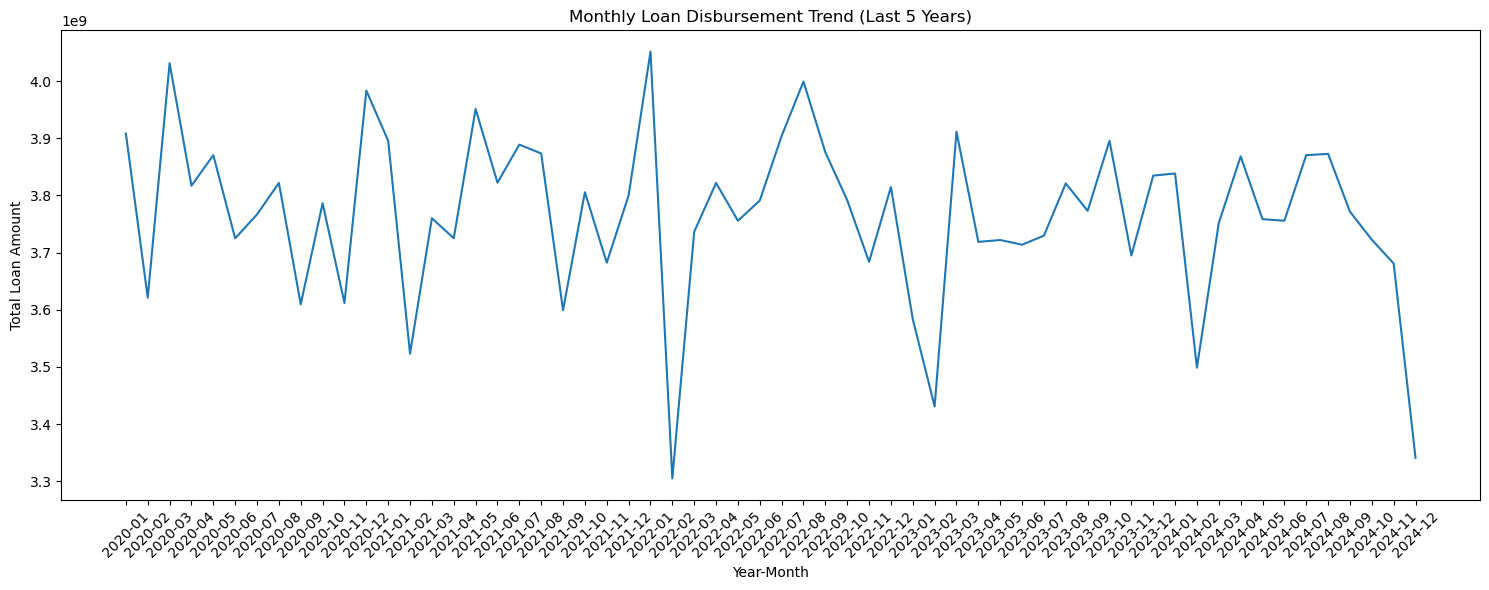

/var/folders/7v/b4cx31gj2m15lfjrqk3sy1240000gp/T/ipykernel_63181/3542211714.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_applications, x='Application_Month', y='Application_Count', palette='viridis')


/var/folders/7v/b4cx31gj2m15lfjrqk3sy1240000gp/T/ipykernel_63181/3542211714.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_disbursements_by_month, x='Loan_Start_Month', y='Total_Loan_Amount', palette='viridis')


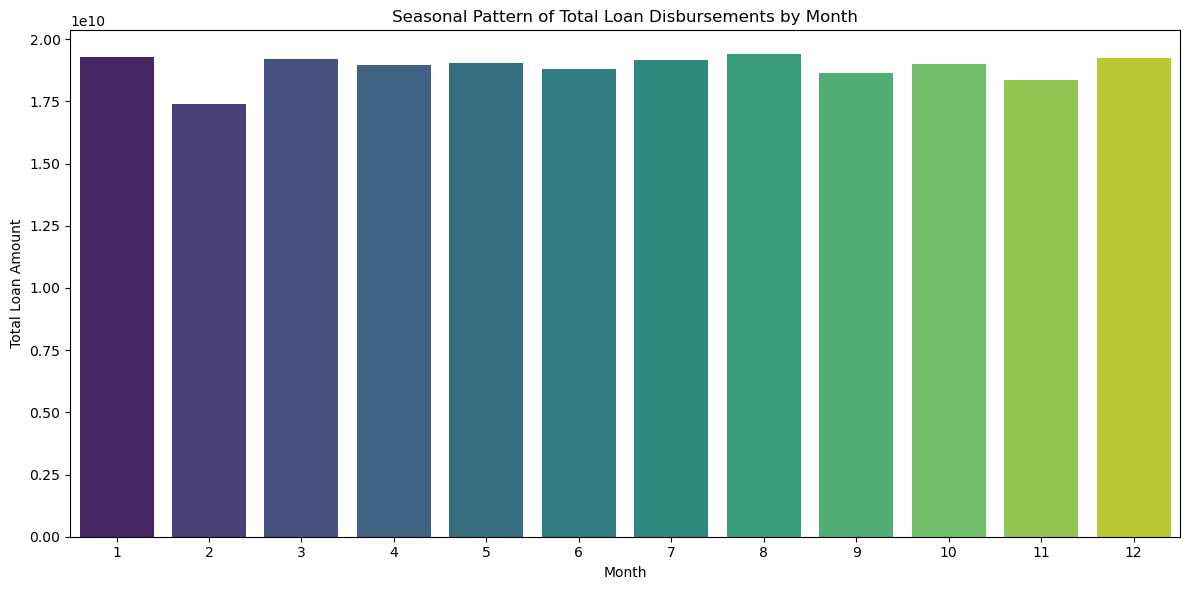

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Line plot of monthly_disbursements_last_5_years
plt.figure(figsize=(15, 6))
# Combine year and month for a continuous x-axis
monthly_disbursements_last_5_years['Year_Month'] = monthly_disbursements_last_5_years['Loan_Start_Year'].astype(str) + '-' + monthly_disbursements_last_5_years['Loan_Start_Month'].astype(str).str.zfill(2)
sns.lineplot(data=monthly_disbursements_last_5_years, x='Year_Month', y='Loan_Amount')
plt.title('Monthly Loan Disbursement Trend (Last 5 Years)')
plt.xlabel('Year-Month')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar plot of monthly_applications
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_applications, x='Application_Month', y='Application_Count', palette='viridis')
plt.title('Seasonal Pattern of Loan Applications by Month')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(0, 12), labels=[str(i+1) for i in range(12)])
plt.tight_layout()
plt.show()

# 3. Bar plot of monthly_disbursements_by_month
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_disbursements_by_month, x='Loan_Start_Month', y='Total_Loan_Amount', palette='viridis')
plt.title('Seasonal Pattern of Total Loan Disbursements by Month')
plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.xticks(ticks=range(0, 12), labels=[str(i+1) for i in range(12)])
plt.tight_layout()
plt.show()

# 4. Line plot of default_rates_df by Region
plt.figure(figsize=(14, 7))
sns.lineplot(data=default_rates_df, x='Default_Month', y='Default_Rate', hue='Region', marker='o')
plt.title('Monthly Default Rates by Region')
plt.xlabel('Month')
plt.ylabel('Default Rate (%)')
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()